<a href="https://colab.research.google.com/github/ArmandoJM/learning-area/blob/master/MachineLearningClassification-WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [11]:
# Load Data from DataSet, then Data Pre-Processing, and Selection
wine= load_wine()

df = pd.DataFrame(data= np.c_[wine['data'],
                             wine['target']], columns= wine['feature_names'] + ['targets'])
x = wine.data
y = wine.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,targets
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [12]:
# ,'malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols'
X = np.asarray(df[['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols']])
df.shape
df['flavanoids'] = df['flavanoids'].astype('int')
X[0:5]

array([[ 14.23,   1.71,   2.43,  15.6 , 127.  ,   2.8 ],
       [ 13.2 ,   1.78,   2.14,  11.2 , 100.  ,   2.65],
       [ 13.16,   2.36,   2.67,  18.6 , 101.  ,   2.8 ],
       [ 14.37,   1.95,   2.5 ,  16.8 , 113.  ,   3.85],
       [ 13.24,   2.59,   2.87,  21.  , 118.  ,   2.8 ]])

In [13]:
y = np.asarray(df['flavanoids'])
y [0:5]

array([3, 2, 3, 3, 2])

In [14]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739]])

Train/Test dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (142, 6) (142,)
Test set: (36, 6) (36,)


Modeling (Logistic Regression with Scikit-learn)

In [16]:

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

SVC


Decision Tree


Model Evaluation using Confusion Matrix

In [17]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10,  3,  0,  0],
       [ 0,  6,  0,  0],
       [ 0,  1,  9,  3],
       [ 0,  0,  1,  3]])

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [19]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 3, 3, 1, 0, 3, 2, 3, 1, 1, 3, 1, 0, 3, 1, 3, 2, 2, 0, 1, 0,
       2, 0, 3, 1, 1, 1, 0, 0, 3, 1, 3, 2, 0, 0])

In [20]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.25016384, 0.22162268, 0.18898928, 0.16288232, 0.17634188],
       [0.25283684, 0.21667032, 0.19574477, 0.15484113, 0.17990694],
       [0.15100436, 0.13931403, 0.22997932, 0.30937248, 0.1703298 ],
       [0.21805565, 0.15159723, 0.208899  , 0.24626072, 0.1751874 ],
       [0.19111156, 0.22339994, 0.22115511, 0.18928488, 0.17504852],
       [0.23622128, 0.23170072, 0.21704932, 0.13298065, 0.18204803],
       [0.16666064, 0.17204582, 0.23707913, 0.24805461, 0.1761598 ],
       [0.13478468, 0.19712313, 0.26846879, 0.2220751 , 0.1775483 ],
       [0.16329071, 0.17935307, 0.2240254 , 0.26252676, 0.17080406],
       [0.17858983, 0.24140412, 0.20747464, 0.20362147, 0.16890994],
       [0.20852859, 0.24822966, 0.21456176, 0.15217429, 0.17650571],
       [0.15061192, 0.14934444, 0.23742816, 0.28930637, 0.17330911],
       [0.2436195 , 0.24436939, 0.19599489, 0.13923611, 0.17678011],
       [0.25489727, 0.20621998, 0.19484549, 0.16447663, 0.17956063],
       [0.15956635, 0.15995739, 0.

In [21]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6666666666666666

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  0]
 [ 2 11]]


Confusion matrix, without normalization
[[ 6  0]
 [ 2 11]]


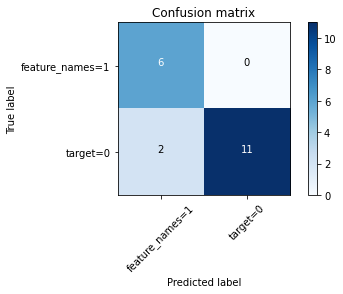

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['feature_names=1','target=0'],normalize= False,  title='Confusion matrix')

In [24]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.60      1.00      0.75         6
           2       0.80      0.31      0.44        13
           3       0.30      0.75      0.43         4

    accuracy                           0.67        36
   macro avg       0.68      0.73      0.63        36
weighted avg       0.78      0.67      0.66        36



In [26]:
################
import numpy as np
from sklearn import svm
X=x[:,6:8]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

ValueError: ignored

In [ ]:

 
X = np.array([[0, 0], [1, 1]])
y = [0, 1]
clf = svm.SVC(kernel='precomputed')

# kernel computation
K = np.zeros(shape = (n, n))

# "At the moment, the kernel values between all training vectors 
#  and the test vectors must be provided." 
#  according to scikit learn web page. 
#  -- This is the problem!
# v1: array, shape (n, d)
# w1: float in [0, 1)
chi = sklearn.metrics.pairwise.chi2_kernel(v1, v1)
mu = 1.0 / numpy.mean(chi)
K += w1 * numpy.exp(-mu * chi)

# v2: array, shape (n, d)
# w2: float in [0, 1)
chi = sklearn.metrics.pairwise.chi2_kernel(v2, v2)
mu = 1.0 / numpy.mean(chi)
K += w2 * numpy.exp(-mu * chi)

# v3: array, shape (n, d)
# w3: float in [0, 1)
chi = sklearn.metrics.pairwise.chi2_kernel(v3, v3)
mu = 1.0 / numpy.mean(chi)
K += w3 * numpy.exp(-mu * chi)

# v4: array, shape (n, d)
# w4: float in [0, 1)
chi = sklearn.metrics.pairwise.chi2_kernel(v4, v4)
mu = 1.0 / numpy.mean(chi)
K += w4 * numpy.exp(-mu * chi)

# scikit-learn is a wrapper LIBSVM and looking at the LIBSVM Readme file
# it seems you need kernel values for test data something like this:    

Kt = numpy.zeros(shape = (nt, n))
# t1: array, shape (nt, d)
# w1: float in [0, 1)
chi = sklearn.metrics.pairwise.chi2_kernel(t1, v1)
mu = 1.0 / numpy.mean(chi)
Kt += w1 * numpy.exp(-mu * chi)

# v2: array, shape (n, d)
# w2: float in [0, 1)
chi = sklearn.metrics.pairwise.chi2_kernel(t2, v2)
mu = 1.0 / numpy.mean(chi)
Kt += w2 * numpy.exp(-mu * chi)

# v3: array, shape (n, d)
# w3: float in [0, 1)
chi = sklearn.metrics.pairwise.chi2_kernel(t3, v3)
mu = 1.0 / numpy.mean(chi)
Kt += w3 * numpy.exp(-mu * chi)

# v4: array, shape (n, d)
# w4: float in [0, 1)
chi = sklearn.metrics.pairwise.chi2_kernel(t4, v4)
mu = 1.0 / numpy.mean(chi)
Kt += w4 * numpy.exp(-mu * chi)

clf.fit(K, y) 

# predict on testing examples
probas_ = clf.predict_proba(Kt)

NameError: ignored